In [1]:
import pandas as pd 
import math
from datetime import datetime,date
import datetime
import numpy as np
import xarray as xr
import scipy.stats as st
from sklearn.datasets.samples_generator import make_blobs
import warnings
warnings.filterwarnings('ignore')
from matplotlib import gridspec

/home/maltem/.local/lib/python3.6/site-packages/pandas/compat/_optional.py:124: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '1.2.0' currently installed).
  warnings.warn(msg, UserWarning)
/home/maltem/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
def results_summary_to_dataframe(results):
    '''take the result of an statsmodel results table and transforms it into a dataframe'''
    pvals = results.pvalues
    coeff = results.params
    conf=results.conf_int()
    conf_lower = conf[:,0]
    conf_higher = conf[:,1]

    results_df = pd.DataFrame({"pvals":pvals,
                               "coeff":coeff,
                               "conf_lower":conf_lower,
                               "conf_higher":conf_higher
                                })

    #Reordering...
    results_df = results_df[["coeff","pvals","conf_lower","conf_higher"]]
    return results_df

In [3]:
era5_sfs30 = pd.read_csv('../data/v03/mosasfs_level2v3_30_ERA5.csv')
# Fixing the different time axis representations:
for i in range(np.max(np.shape(era5_sfs30))):
    era5_sfs30['datetime'][i]= datetime.datetime.strptime(era5_sfs30.datetime[i], '%Y-%m-%d %H:%M:%S')

     
era5_sfs40 = pd.read_csv('../data/v03/mosasfs_level2v3_40_ERA5.csv')
# Fixing the different time axis representations:
for i in range(np.max(np.shape(era5_sfs40))):
    era5_sfs40['datetime'][i]= datetime.datetime.strptime(era5_sfs40.datetime[i], '%Y-%m-%d %H:%M:%S')    
    
    
era5_sfs50 = pd.read_csv('../data/v03/mosasfs_level2v3_50_ERA5.csv')
# Fixing the different time axis representations:
for i in range(np.max(np.shape(era5_sfs50))):
    era5_sfs50['datetime'][i]= datetime.datetime.strptime(era5_sfs50.datetime[i], '%Y-%m-%d %H:%M:%S')    
    
merra_sfs30 = pd.read_csv('../data/v03/mosasfs_level2v3_30_MERRA.csv')
# Fixing the different time axis representations:
for i in range(np.max(np.shape(merra_sfs30))):
    merra_sfs30['datetime'][i]= datetime.datetime.strptime(merra_sfs30.datetime[i], '%Y-%m-%d %H:%M:%S')
    
merra_sfs40 = pd.read_csv('../data/v03/mosasfs_level2v3_40_MERRA.csv')
# Fixing the different time axis representations:
for i in range(np.max(np.shape(merra_sfs40))):
    merra_sfs40['datetime'][i]= datetime.datetime.strptime(merra_sfs40.datetime[i], '%Y-%m-%d %H:%M:%S')    
    
merra_sfs50 = pd.read_csv('../data/v03/mosasfs_level2v3_50_MERRA.csv')
# Fixing the different time axis representations:
for i in range(np.max(np.shape(merra_sfs50))):
    merra_sfs50['datetime'][i]= datetime.datetime.strptime(merra_sfs50.datetime[i], '%Y-%m-%d %H:%M:%S')   
    
ncep_sfs30 = pd.read_csv('../data/v03/mosasfs_level2v3_30_NCEP.csv')
# Fixing the different time axis representations:
for i in range(np.max(np.shape(ncep_sfs30))):
    ncep_sfs30['datetime'][i]= datetime.datetime.strptime(ncep_sfs30.datetime[i], '%Y-%m-%d %H:%M:%S')  
    
ncep_sfs40 = pd.read_csv('../data/v03/mosasfs_level2v3_40_NCEP.csv')
# Fixing the different time axis representations:
for i in range(np.max(np.shape(ncep_sfs40))):
    ncep_sfs40['datetime'][i]= datetime.datetime.strptime(ncep_sfs40.datetime[i], '%Y-%m-%d %H:%M:%S')  
    
ncep_sfs50 = pd.read_csv('../data/v03/mosasfs_level2v3_50_NCEP.csv')
# Fixing the different time axis representations:
for i in range(np.max(np.shape(ncep_sfs50))):
    ncep_sfs50['datetime'][i]= datetime.datetime.strptime(ncep_sfs50.datetime[i], '%Y-%m-%d %H:%M:%S')  

In [4]:
if (True):

    mosasfs30met = xr.open_dataset("../data/v03/mosasfs30met.level2v3.10min.all.nc")
    mosasfs40met = xr.open_dataset("../data/v03/mosseb.asfs40.level2v3.10min.all.nc")
    mosasfs50met = xr.open_dataset("../data/v03/mosseb.asfs50.level2v3.10min.all.nc")
    
    mosasfs30met_1h = mosasfs30met.resample(time="1H").interpolate("linear")
    mosasfs40met_1h = mosasfs40met.resample(time="1H").interpolate("linear")
    mosasfs50met_1h = mosasfs50met.resample(time="1H").interpolate("linear")
    
    pd.DataFrame(mosasfs30met_1h).to_csv("../data/v03/mosasfs30met.level2v3.1h.all.csv",index=None) 
    pd.DataFrame(mosasfs40met_1h).to_csv("../data/v03/mosasfs40met.level2v3.1h.all.csv",index=None) 
    pd.DataFrame(mosasfs50met_1h).to_csv("../data/v03/mosasfs50met.level2v3.1h.all.csv",index=None)     
else:
    mosasfs30met_1h = pd.read_csv('../data/v03/mosasfs30met.level2v3.1h.all.csv')
    mosasfs40met_1h = pd.read_csv('../data/v03/mosasfs40met.level2v3.1h.all.csv')
    mosasfs50met_1h = pd.read_csv('../data/v03/mosasfs50met.level2v3.1h.all.csv')

In [5]:
def LSF_predict(x_predict,y_predict):
    #x_predict = np.array(era5_sfs40['strd']/3600)
    #y_predict = mosasfs40met_1h['skin_temp_surface']-(era5_sfs40['skt']-273.15)

    x_predict = np.array(x_predict[~np.isnan(y_predict)])

    y_predict = np.array(y_predict[~np.isnan(y_predict)])
    
    x = sm.add_constant(x_predict)
    result = sm.OLS(y_predict, x).fit(); df_result = results_summary_to_dataframe(result)
    return df_result.coeff[0], df_result.coeff[1]
#skt_era5_corr = df_result.coeff[0] + df_result.coeff[1] * np.array(era5_sfs40['strd']/3600)


Text(0.5, 1.0, 'Net LW energy budget')

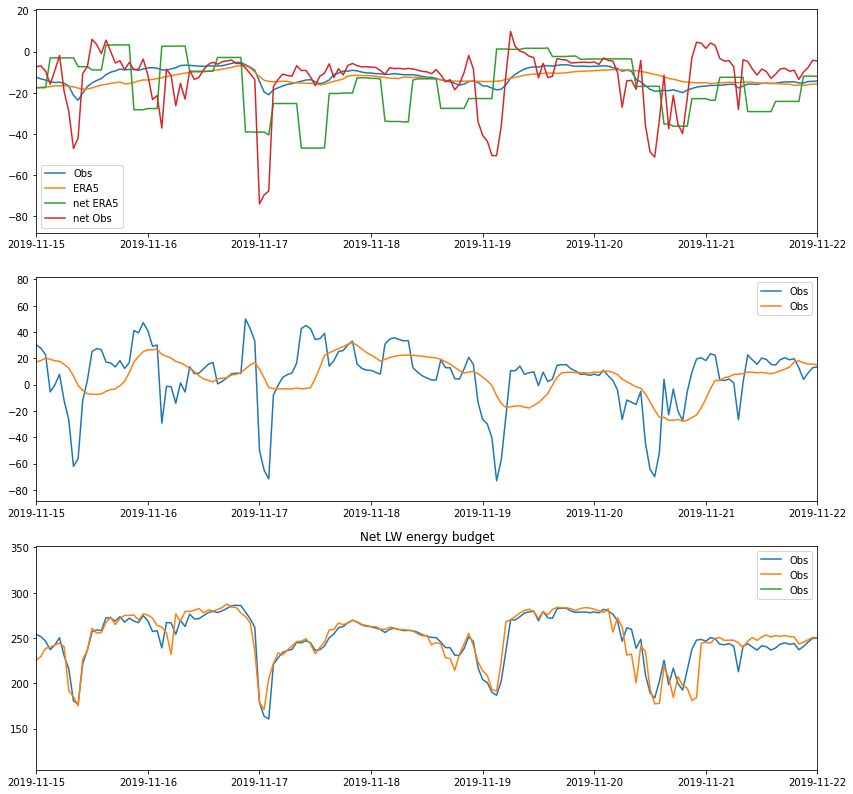

In [114]:
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker

tstart=pd.Timestamp('2019-11-15')
tend=pd.Timestamp('2019-11-22')

fig = plt.figure(figsize=(14,14))

ax1 = plt.subplot(311)
ax1.plot(mosasfs40met_1h.time, mosasfs40met_1h.skin_temp_surface, '-',label='Obs')
ax1.plot(era5_sfs40.datetime,era5_sfs40['skt']-273.15,'-',label='ERA5')
ax1.plot(era5_sfs40.datetime,era5_sfs40['stru']/3600,'-',label='net ERA5')
ax1.plot(mosasfs40met_1h['time'],mosasfs40met_1h['down_long_hemisp']-mosasfs40met_1h['up_long_hemisp'],'-',label='net Obs')



ax1.set_xlim(tstart,tend)
ax1.legend()
diffval = pd.Series(mosasfs40met_1h['down_long_hemisp']-era5_sfs40['strd']/3600)
diffval.rolling(24*4).mean()
ax2 = plt.subplot(312)
ax2.plot(mosasfs40met_1h.time, mosasfs40met_1h['down_long_hemisp']-era5_sfs40['strd']/3600, '-',label='Obs')
ax2.plot(mosasfs40met_1h.time, diffval.rolling(12).mean(), '-',label='Obs')

#ax2.plot(era5_sfs40.datetime,era5_sfs40['strd']/3600,'-',label='ERA5')
#ax2.plot(era5_sfs40.datetime,era5_sfs40['stru']/3600+LWup,'-',label='net Obs')
ax2.set_xlim(tstart,tend)
ax2.legend()


ax1 = plt.subplot(313)
#ax1.plot(mosasfs40met_1h.time, mosasfs40met_1h.atmos_pressure, '-',label='Obs')
#ax1.plot(ncep_sfs40.datetime,era5_sfs40['sp']/100,'-',label='NCEP2')
ax1.plot(mosasfs40met_1h.time, mosasfs40met_1h['down_long_hemisp'], '-',label='Obs')
ax1.plot(mosasfs50met_1h.time, mosasfs50met_1h['down_long_hemisp'], '-',label='Obs')
ax1.plot(mosasfs30met_1h.time, mosasfs30met_1h['down_long_hemisp'], '-',label='Obs')

#ax1.plot(ncep_sfs40.datetime,ncep_sfs40['skt']-273.15 + skt_ncep_corr,'-',label='NCEP2 corrected')
ax1.set_xlim(tstart,tend)
ax1.legend()

plt.title('Net LW energy budget')


### Least Square Fit

NameError: name 'skt_merra_corr' is not defined

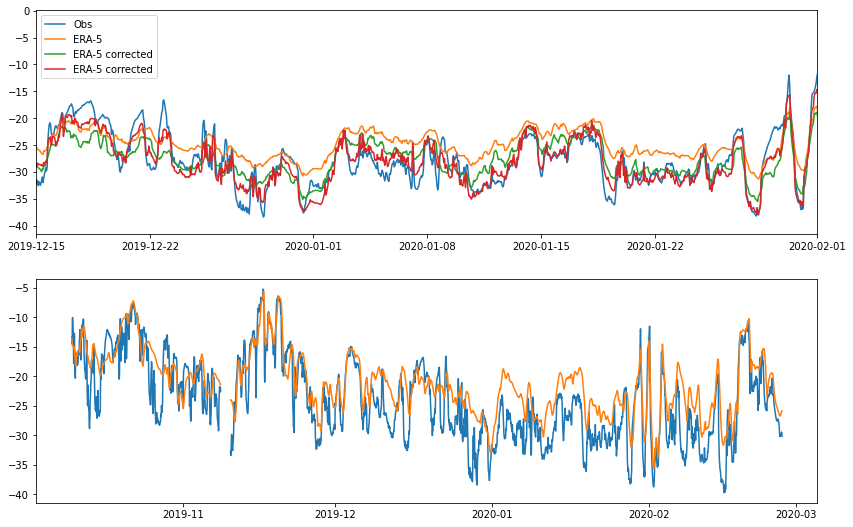

In [92]:
import statsmodels.api as sm

[a_era5, b_era5] = LSF_predict(np.array(era5_sfs40['strd']/3600), 
                              np.array(mosasfs40met_1h['skin_temp_surface']-(era5_sfs40['skt']-273.15)) )

skt_era5_corr = a_era5 + b_era5 * np.array(era5_sfs40['strd']/3600)

[a_era5, b_era5] = LSF_predict(np.array(mosasfs40met_1h['down_long_hemisp']), 
                              np.array(mosasfs40met_1h['skin_temp_surface']-(era5_sfs40['skt']-273.15)) )

skt_era5_corr2 = a_era5 + b_era5 * np.array(np.array(mosasfs40met_1h['down_long_hemisp']))

#y_merra_predict = mosasfs40met_1h['skin_temp_surface']-(merra_sfs40['skt']-273.15)
#y_merra_predict = np.array(y_merra_predict[~np.isnan(x_predict)])
#y_ncep_predict = mosasfs40met_1h['skin_temp_surface']-(ncep_sfs40['skt']-273.15)
#y_ncep_predict = np.array(y_ncep_predict[~np.isnan(x_predict)])








from matplotlib import pyplot as plt
import matplotlib.ticker as ticker

tstart=pd.Timestamp('2019-12-15')
tend=pd.Timestamp('2020-2-1')

fig = plt.figure(figsize=(14,14))

ax1 = plt.subplot(311)
ax1.plot(mosasfs40met_1h.time, mosasfs40met_1h.skin_temp_surface, '-',label='Obs')
ax1.plot(era5_sfs40.datetime,era5_sfs40['skt']-273.15,'-',label='ERA-5')
ax1.plot(era5_sfs40.datetime,era5_sfs40['skt']-273.15 + skt_era5_corr,'-',label='ERA-5 corrected')
ax1.plot(era5_sfs40.datetime,era5_sfs40['skt']-273.15 + skt_era5_corr2,'-',label='ERA-5 corrected')
ax1.set_xlim(tstart,tend)
ax1.legend()

ax1 = plt.subplot(312)
ax1.plot(mosasfs40met_1h.time, mosasfs40met_1h.skin_temp_surface, '-',label='Obs')
ax1.plot(era5_sfs40.datetime,merra_sfs40['skt']-273.15,'-',label='MERRA2')
ax1.plot(era5_sfs40.datetime,merra_sfs40['skt']-273.15 + skt_merra_corr,'-',label='MERRA2 corrected')
ax1.set_xlim(tstart,tend)
ax1.legend()

ax1 = plt.subplot(313)
ax1.plot(mosasfs40met_1h.time, mosasfs40met_1h.skin_temp_surface, '-',label='Obs')
ax1.plot(ncep_sfs40.datetime,ncep_sfs40['skt']-273.15,'-',label='NCEP2')
ax1.plot(ncep_sfs40.datetime,ncep_sfs40['skt']-273.15 + skt_ncep_corr,'-',label='NCEP2 corrected')
ax1.set_xlim(tstart,tend)
ax1.legend()

plt.title('Skin Temperature')


### Scatter Plots

Text(0.5, 1.0, 'NCEP')

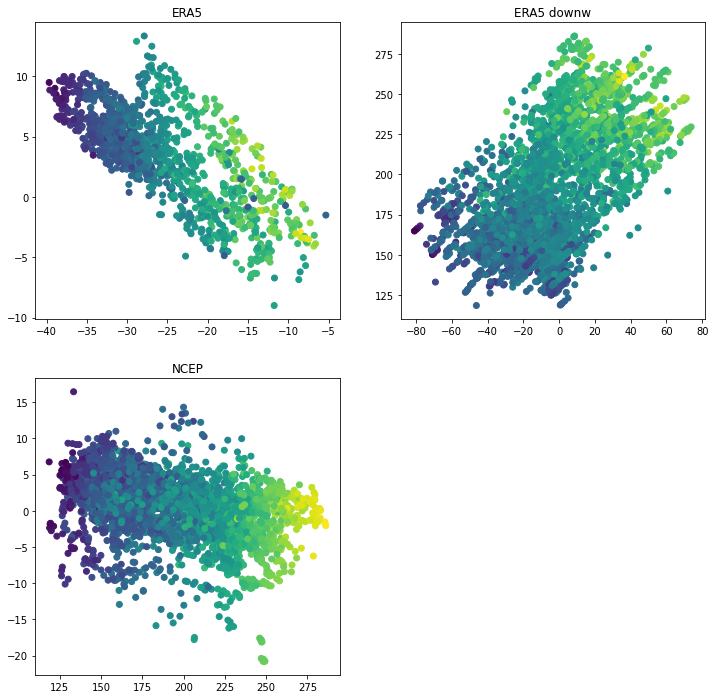

In [53]:
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker


fig = plt.figure(figsize=(12,12))

ax1 = plt.subplot(221)
ax1.scatter(mosasfs40met_1h.skin_temp_surface,era5_sfs40['skt']-273.15-mosasfs40met_1h.skin_temp_surface,c=era5_sfs40['ist'],marker='o',label='Obs')
#ax1.scatter( era5_sfs40['strd']/3600,mosasfs40met_1h.down_long_hemisp,c=mosasfs40met_1h.skin_temp_surface,marker='o',label='Obs')


#ax1.scatter( x_predict,y_2)
#ax1.legend()
#ax1.set_ylim(120,270)
plt.title('ERA5')

ax2 = plt.subplot(222)
ax2.scatter( mosasfs40met_1h.down_long_hemisp-era5_sfs40['strd']/3600,mosasfs40met_1h.down_long_hemisp,c=mosasfs40met_1h.skin_temp_surface-era5_sfs40['skt'],marker='o',label='Obs')
#ax1.scatter( x_predict,y_2)
#ax2.legend()
#ax1.set_ylim(120,270)
plt.title('ERA5 downw')

ax2 = plt.subplot(223)
ax2.scatter( mosasfs40met_1h.down_long_hemisp,ncep_sfs40['skt']-273.15-mosasfs40met_1h.skin_temp_surface,c=mosasfs40met_1h.skin_temp_surface,marker='o',label='Obs')
#ax1.scatter( x_predict,y_2)
#ax2.legend()
#ax1.set_ylim(120,270)
plt.title('NCEP')


In [31]:
mosasfs40met_1h

<xarray.Dataset>
Dimensions:                     (freq: 60, time: 3384)
Coordinates:
  * time                        (time) datetime64[ns] 2019-10-10 ... 2020-02-...
Dimensions without coordinates: freq
Data variables:
    lat                         (time) float64 84.83 84.84 84.84 ... nan nan nan
    lon                         (time) float64 134.6 134.6 134.6 ... nan nan nan
    heading                     (time) float64 82.5 82.48 82.11 ... nan nan nan
    zenith_true                 (time) float64 92.54 91.82 91.41 ... nan nan nan
    zenith_apparent             (time) float64 92.54 91.82 91.41 ... nan nan nan
    azimuth                     (time) float64 139.2 154.1 169.0 ... nan nan nan
    ship_distance               (time) float64 1.341e+04 1.341e+04 ... nan nan
    ship_bearing                (time) float64 48.72 48.53 48.33 ... nan nan nan
    sr50_dist                   (time) float64 2.089 2.089 2.088 ... nan nan nan
    snow_depth                  (time) float64 8.773 8.741 8.864 ... nan nan nan
    atmos_pressure              (time) float64 1.008e+03 1.008e+03 ... nan nan
    temp                        (time) float64 -13.12 -12.92 -11.8 ... nan nan
    rh                          (time) float64 89.21 89.05 88.9 ... nan nan nan
    dew_point                   (time) float64 -14.51 -14.34 -13.25 ... nan nan
    mixing_ratio                (time) float64 1.232 1.249 1.365 ... nan nan nan
    vapor_pressure              (time) float64 199.2 202.0 220.8 ... nan nan nan
    rhi                         (time) float64 101.4 101.0 99.77 ... nan nan nan
    brightness_temp_surface     (time) float64 -13.36 -14.48 -13.68 ... nan nan
    skin_temp_surface           (time) float64 -13.4 -14.52 -13.83 ... nan nan
    subsurface_heat_flux_A      (time) float64 19.31 23.49 22.15 ... nan nan nan
    subsurface_heat_flux_B      (time) float64 18.94 23.21 21.65 ... nan nan nan
    wspd_u_mean                 (time) float64 -3.261 -2.811 -2.414 ... nan nan
    wspd_v_mean                 (time) float64 -3.779 -3.41 -3.059 ... nan nan
    wspd_w_mean                 (time) float64 0.3511 0.2777 0.2414 ... nan nan
    wspd_vec_mean               (time) float64 4.996 4.421 3.898 ... nan nan nan
    wdir_vec_mean               (time) float64 40.79 39.45 38.24 ... nan nan nan
    temp_acoustic               (time) float64 -13.01 -12.66 -11.18 ... nan nan
    wspd_u_std                  (time) float64 0.4334 0.3418 0.3072 ... nan nan
    wspd_v_std                  (time) float64 0.5392 0.5323 0.4228 ... nan nan
    wspd_w_std                  (time) float64 0.2081 0.1903 0.1661 ... nan nan
    temp_acoustic_std           (time) float64 0.06037 0.09644 ... nan nan
    h2o_licor                   (time) float64 nan nan nan nan ... nan nan nan
    co2_licor                   (time) float64 nan nan nan nan ... nan nan nan
    down_long_hemisp            (time) float64 244.6 211.8 218.1 ... nan nan nan
    down_short_hemisp           (time) float64 1.792 2.822 3.93 ... nan nan nan
    up_long_hemisp              (time) float64 257.9 253.0 255.8 ... nan nan nan
    up_short_hemisp             (time) float64 1.468 2.333 3.088 ... nan nan nan
    net_radiation               (time) float64 -12.97 -40.76 -36.91 ... nan nan
    lat_qc                      (time) float64 0.0 0.0 0.0 0.0 ... nan nan nan
    lon_qc                      (time) float64 0.0 0.0 0.0 0.0 ... nan nan nan
    heading_qc                  (time) float64 0.0 0.0 0.0 0.0 ... nan nan nan
    zenith_true_qc              (time) float64 0.0 0.0 0.0 0.0 ... nan nan nan
    zenith_apparent_qc          (time) float64 0.0 0.0 0.0 0.0 ... nan nan nan
    azimuth_qc                  (time) float64 0.0 0.0 0.0 0.0 ... nan nan nan
    ship_distance_qc            (time) float64 0.0 0.0 0.0 0.0 ... nan nan nan
    ship_bearing_qc             (time) float64 0.0 0.0 0.0 0.0 ... nan nan nan
    sr50_dist_qc                (time) float64 0.0 0.0 0.0 0.0 ... nan nan nan
    snow_depth_qc       

In [24]:
era5_sfs40

,datetime,ssrd,strd,ssru,stru,t2m,u10m,v10m,sp,tcc,skt,istl,sstk,ci,hice,fice,hsnow,ist
0,2019-10-10 00:00:00,0.0,896178.3,3.600000e-12,-93349.87,263.98020,-5.333128,-2.656194,100858.78,0.999571,263.86590,[264.20517],271.45996,0.993370,0.415408,0.992949,0.083738,255.914062
1,2019-10-10 01:00:00,0.0,897265.9,3.600000e-12,-92316.51,263.78705,-5.835805,-3.033926,100925.31,0.997100,263.73486,[264.07516],271.45996,0.992691,0.415408,0.992949,0.083738,NaN
2,2019-10-10 02:00:00,0.0,897265.9,3.600000e-12,-92316.51,263.53210,-6.193239,-3.115149,100987.69,0.995138,263.54575,[263.91763],271.45996,0.992691,0.415408,0.992949,0.083738,258.313477
3,2019-10-10 03:00:00,0.0,898969.3,3.600000e-12,-76910.26,263.32602,-6.245724,-3.226942,101062.94,1.000000,263.47018,[263.8263],271.45996,0.992691,0.434027,0.992843,0.083692,255.175781
4,2019-10-10 04:00:00,0.0,898969.3,3.600000e-12,-76910.26,263.12494,-6.015047,-3.416130,101125.57,1.000000,263.40015,[263.74963],271.45996,0.992691,0.434027,0.992843,0.083692,253.653320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3379,2020-02-27 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3380,2020-02-27 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3381,2020-02-27 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3382,2020-02-27 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Impact on Arctic Atmospheric Winter States

Text(0.5, 1.0, 'Net longwave ERA-5 corr')

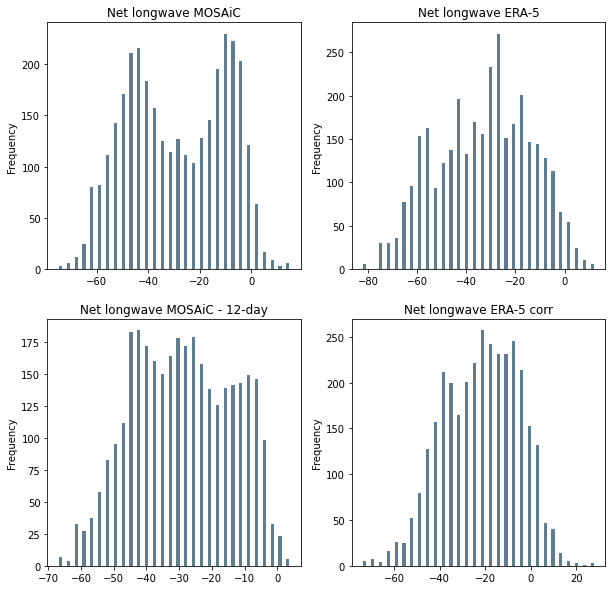

In [95]:
fig = plt.figure(figsize=(10, 10)) 
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1]) 

ax0 = plt.subplot(gs[0])
dist=pd.Series(mosasfs40met_1h['down_long_hemisp']-mosasfs40met_1h['up_long_hemisp'])
#dist = dist.rolling(24).mean()
dist.plot.hist( bins=30, rwidth=0.4, color='#607c8e')
ax0.set_title('Net longwave MOSAiC')

ax1 = plt.subplot(gs[1])
dist=(era5_sfs40['stru'])/3600
dist.plot.hist( bins=30, rwidth=0.4, color='#607c8e')
ax1.set_title('Net longwave ERA-5')

ax1 = plt.subplot(gs[2])
dist=pd.Series(mosasfs40met_1h['down_long_hemisp']-mosasfs40met_1h['up_long_hemisp'])
dist = dist.rolling(12).mean()
dist.plot.hist( bins=30, rwidth=0.4, color='#607c8e')
ax1.set_title('Net longwave MOSAiC - 12-day')



#Calc net-budget with Tskin
#LWup = (1-eps)*era5_sfs40['strd']/3600 + eps * sigma * era5_sfs40['skt']**4
#ax1 = plt.subplot(gs[2])
#dist=(era5_sfs40['strd'])/3600 - LWup
#dist.plot.hist( bins=40, rwidth=0.6, color='#607c8e')
#ax1.set_title('Net longwave ERA-5')

#Calc net-budget with Tskin
eps = 0.99; sigma=5.567e-8
LWup = (1-eps)*era5_sfs40['strd']/3600 + eps * sigma * (era5_sfs40['skt'] + skt_era5_corr2 )**4

ax1 = plt.subplot(gs[3])
dist=(era5_sfs40['strd'])/3600 - LWup
dist.plot.hist( bins=30, rwidth=0.4, color='#607c8e')
ax1.set_title('Net longwave ERA-5 corr')


In [102]:
era5_sfs40

,datetime,ssrd,strd,ssru,stru,t2m,u10m,v10m,sp,tcc,skt,istl,sstk,ci,hice,fice,hsnow,ist
0,2019-10-10 00:00:00,0.0,896178.3,3.600000e-12,-93349.87,263.98020,-5.333128,-2.656194,100858.78,0.999571,263.86590,[264.20517],271.45996,0.993370,0.415408,0.992949,0.083738,255.914062
1,2019-10-10 01:00:00,0.0,897265.9,3.600000e-12,-92316.51,263.78705,-5.835805,-3.033926,100925.31,0.997100,263.73486,[264.07516],271.45996,0.992691,0.415408,0.992949,0.083738,NaN
2,2019-10-10 02:00:00,0.0,897265.9,3.600000e-12,-92316.51,263.53210,-6.193239,-3.115149,100987.69,0.995138,263.54575,[263.91763],271.45996,0.992691,0.415408,0.992949,0.083738,258.313477
3,2019-10-10 03:00:00,0.0,898969.3,3.600000e-12,-76910.26,263.32602,-6.245724,-3.226942,101062.94,1.000000,263.47018,[263.8263],271.45996,0.992691,0.434027,0.992843,0.083692,255.175781
4,2019-10-10 04:00:00,0.0,898969.3,3.600000e-12,-76910.26,263.12494,-6.015047,-3.416130,101125.57,1.000000,263.40015,[263.74963],271.45996,0.992691,0.434027,0.992843,0.083692,253.653320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3379,2020-02-27 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3380,2020-02-27 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3381,2020-02-27 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3382,2020-02-27 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:ylabel='Frequency'>

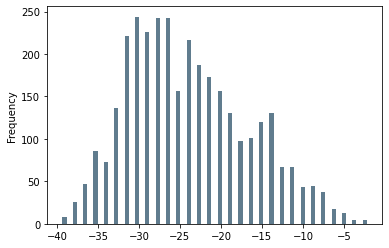

In [84]:

#dist.plot.hist( bins=30, rwidth=0.4)

(array([  3.,   6.,  12.,  25.,  80.,  82., 111., 142., 171., 210., 215.,
        183., 157., 125., 114., 127., 111., 103., 128., 145., 195., 229.,
        222., 203., 121.,  64.,  17.,   9.,   3.,   6.]),
 array([-75.6496462 , -72.59998141, -69.55031662, -66.50065182,
        -63.45098703, -60.40132224, -57.35165745, -54.30199265,
        -51.25232786, -48.20266307, -45.15299827, -42.10333348,
        -39.05366869, -36.00400389, -32.9543391 , -29.90467431,
        -26.85500951, -23.80534472, -20.75567993, -17.70601513,
        -14.65635034, -11.60668555,  -8.55702076,  -5.50735596,
         -2.45769117,   0.59197362,   3.64163842,   6.69130321,
          9.740968  ,  12.7906328 ,  15.84029759]),
 <BarContainer object of 30 artists>)

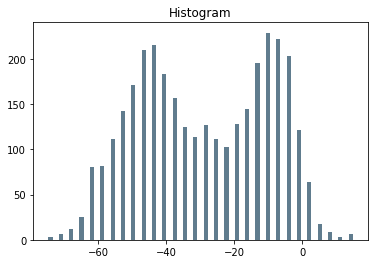

In [88]:

dist.plot.hist( bins=30, rwidth=0.4, color='#607c8e')
#dist=era5_sfs40['skt']-273.15
#dist.plot.hist( bins=30, rwidth=0.4)

<xarray.DataArray (time: 3384)>
array([-13.29915296, -41.24830401, -37.75595292, ...,          nan,
                nan,          nan])
Coordinates:
  * time     (time) datetime64[ns] 2019-10-10 ... 2020-02-27T23:00:00

114.40411107816047 291.73920701813046 968.4911429999999 1040.5245869999999


Text(0.5, 1.0, '2D Gaussian Kernel density estimation')

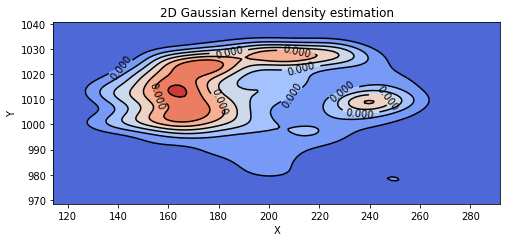

In [81]:
#Grid two variables on a 2D meshgrid 
import matplotlib.pyplot as plt
# Extract x and y
#x = np.array(mosasfs40met_1h['wspd_vec_mean'])
dvar = pd.Series(mosasfs40met_1h['down_long_hemisp'])
x = np.array(dvar.rolling(24).mean())#-mosasfs40met_1h['up_long_hemisp'])#np.array(mosasfs40met_1h['skin_temp_surface'])
#Y = np.array(mosasfs40met_1h['atmos_pressure'])
y = np.array(mosasfs40met_1h['atmos_pressure'])
# Remove all the nans consistently 
y = y[~np.isnan(x)]
x = x[~np.isnan(x)]
x = x[~np.isnan(y)]
y = y[~np.isnan(y)]
# Define the borders
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY
print(xmin, xmax, ymin, ymax)
# Create meshgrid
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

# Fit a kernel
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

# Plot

fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
cfset = ax.contourf(xx, yy, f, cmap='coolwarm')
ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax])
cset = ax.contour(xx, yy, f, colors='k')
ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.title('2D Gaussian Kernel density estimation')

102.22723722222223 293.5215238888889 970.9075300000001 1040.51317


Text(0.5, 1.0, '2D Gaussian Kernel density estimation')

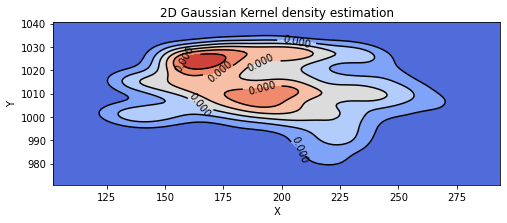

In [47]:
#Grid two variables on a 2D meshgrid 
import matplotlib.pyplot as plt
# Extract x and y
x = np.array(era5_sfs40['strd'])/3600
#x = np.array(era5_sfs40['skt']-273.15 + skt_era5_corr2)
#Y = np.array(mosasfs40met_1h['atmos_pressure'])
y = np.array(era5_sfs40['sp']/100)
# Remove all the nans consistently 
y = y[~np.isnan(x)]
x = x[~np.isnan(x)]
x = x[~np.isnan(y)]
y = y[~np.isnan(y)]
# Define the borders
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY
print(xmin, xmax, ymin, ymax)
# Create meshgrid
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

# Fit a kernel
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

# Plot

fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
cfset = ax.contourf(xx, yy, f, cmap='coolwarm')
ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax])
cset = ax.contour(xx, yy, f, colors='k')
ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.title('2D Gaussian Kernel density estimation')

-80.94822420638408 35.86796285179705 970.9075300000001 1040.51317


Text(0.5, 1.0, '2D Gaussian Kernel density estimation')

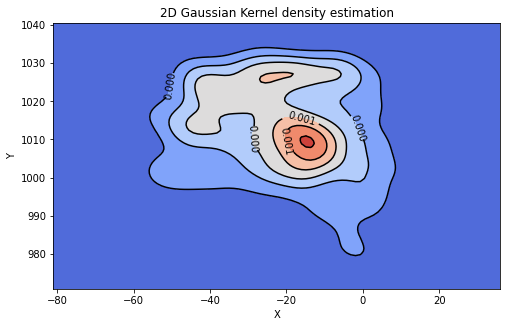

In [20]:
#Grid two variables on a 2D meshgrid 
import matplotlib.pyplot as plt
# Extract x and y
#Calc net-budget with Tskin
eps = 0.99; sigma=5.567e-8
LWup = (1-eps)*era5_sfs40['strd']/3600 + eps * sigma * (era5_sfs40['skt'] + skt_era5_corr )**4

#x = np.array(mosasfs40met_1h['wspd_vec_mean'])
x = np.array(era5_sfs40['strd']/3600 - LWup)
#Y = np.array(mosasfs40met_1h['atmos_pressure'])
y = np.array(era5_sfs40['sp']/100)
# Remove all the nans consistently 
y = y[~np.isnan(x)]
x = x[~np.isnan(x)]
x = x[~np.isnan(y)]
y = y[~np.isnan(y)]
# Define the borders
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY
print(xmin, xmax, ymin, ymax)
# Create meshgrid
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

# Fit a kernel
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

# Plot

fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
cfset = ax.contourf(xx, yy, f, cmap='coolwarm')
ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax])
cset = ax.contour(xx, yy, f, colors='k')
ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.title('2D Gaussian Kernel density estimation')

In [ ]:
## Frequency spectrum

In [146]:
from scipy.fftpack import fft, ifft

times_obs   = pd.Series(mosasfs40met_1h['down_long_hemisp']).interpolate().tolist()
times_model = pd.Series(era5_sfs40['strd']/3600).interpolate().tolist()


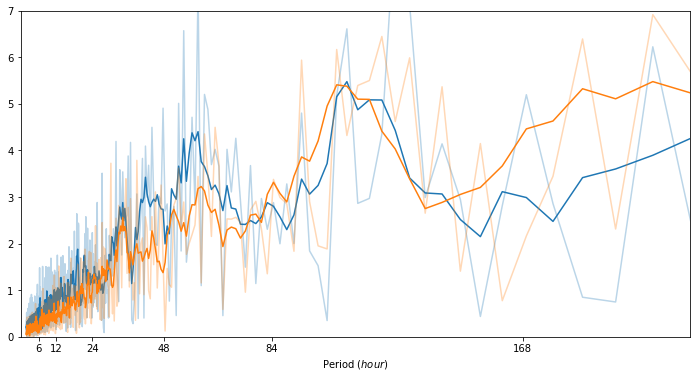

In [162]:
plt.figure(figsize=(12,6))

X = fft(times_obs)
N = len(X)
n = np.arange(N)
# get the sampling rate
sr = 1 / (60*60)
T = N/sr
freq = n/T 

# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]
# convert frequency to hour
t_h = 1/f_oneside / (60 * 60)


#plt.plot(t_h, np.abs(X[:n_oneside])/n_oneside)
plt.plot(t_h, pd.Series(np.abs(X[:n_oneside])/n_oneside).rolling(1).mean(),alpha=0.3,color='C0')
plt.plot(t_h, pd.Series(np.abs(X[:n_oneside])/n_oneside).rolling(6).mean(),alpha=1,color='C0')

# --------------------------------------------------#
    
X = fft(times_model)
N = len(X)
n = np.arange(N)
# get the sampling rate
sr = 1 / (60*60)
T = N/sr
freq = n/T 

# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]
# convert frequency to hour
t_h = 1/f_oneside / (60 * 60)

#plt.plot(t_h, np.abs(X[:n_oneside])/n_oneside)
plt.plot(t_h, pd.Series(np.abs(X[:n_oneside])/n_oneside).rolling(1).mean(),alpha=0.3,color='C1')
plt.plot(t_h, pd.Series(np.abs(X[:n_oneside])/n_oneside).rolling(6).mean(),alpha=1,color='C1')
# --------------------------------------------------#

plt.xticks([6,12, 24, 48, 84, 168])
plt.xlim(0, 224)
plt.xlabel('Period ($hour$)')
plt.ylim(0, 7)
plt.show()
